<a href="https://colab.research.google.com/github/Moly-malibu/Convolutional-Neural-Network/blob/main/Neural%20Network%20Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Major Neural Network Architectures


Explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [ ]:
!pip install numpy==1.16.1
import numpy as np

In [ ]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [ ]:
len(word_index)

30979

In [ ]:
batch_size = 46
max_features = len(word_index.values())+1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [ ]:
#model architechture
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.25, recurrent_dropout=0.2))
model.add(Dense(len(word_index), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 30979)             3996291   
Total params: 8,093,315
Trainable params: 8,093,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# You should only run this cell once your model has been properly configured
print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/2
8982/8982 [==============================] - 78s 9ms/step - loss: 3.5529 - accuracy: 0.3486 - val_loss: 2.3931 - val_accuracy: 0.3664
Epoch 2/2
2246/2246 [==============================] - 2s 783us/step
Test score: 2.4038096380785756
Test accuracy: 0.3664292097091675


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

#Pad_sequences:

Method truncates and pads sequences to a specified length by removing values or adding dumming values till the length is reached.

- This function transforms a list of num_samples sequences (integers) into a matrix of shape. num_timesteps is either the maxlen argument if provided, or the length of the longest sequence otherwise.

Sequences that are shorter than num_timesteps are padded with value at the end.

Sequences longer than num_timesteps are truncated so that they fit the desired length. The position where padding or truncation happens is determined by the arguments padding and truncating, respectively.

sequences	

List of lists where each element is a sequence

maxlen int, maximum length of all sequences

dtype	 type of the output sequences

padding	 'pre' or 'post', pad either before or after each sequence.

truncating	'pre' or 'post', remove values from sequences larger than maxlen either in the beginning or in the end of the sequence

value	float, padding value



## RNNs versus LSTMs

#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

in summary: LSTMs are able store information and make predictions on time-dependent data. Traditional RNNs are unable to effectively predict time-dependent data because the information is not saved to refer to later.

RNN stands for Recurrent Neural Network.

RNNs (recurrent neural networks) are made up of one node. It is fed data then outputs a result back into itself, and continues to do this. Breakthroughs like LSTM (long short term memory) make it smart at remembering things that have happened in the past and finding patterns across time to make its next guesses make sense.

An LSTM is a Long Short-Term Memory layer, which is a type of RNN.

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,[2] speech recognition[3][4] and anomaly detection in network traffic or IDS's (intrusion detection systems).

These layers, built into a network, function as some sort of memory that allows the network to infer from not only the present, but also past events. They do this by keeping a sort of “internal memory” that they modify to keep track of meaningful events that happened.

So really, an LSTM network is a quite common type of RNN. It has been widely adopted since the original RNN layer would tend overwrite too much of its “internal memory” at each step, losing the ability to infer from events further in past.

The LSTM layer architecture is instead built in such a way the the network “decides” whether to modify its “internal memory” at each step. Doing so, and if properly trained, the layer can keep track of important events from further in the past, allowing for much richer inferenc

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

* Sentiment analysis - you can analyze the input of users to see trends in sentiment towards a product or service. An LSTM would be best suited for this because we want to see the feeling over time.

* Text generation - you can predict what a user might input. Standard RNN would be sufficient because its dependent on position, but not time

* Translation - you can translate between languages. A standard RNN would be suitable here for the same reason. Translatotron,






<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [ ]:
from skimage.io import imread_collection
from skimage.transform import resize #This might be a helpful function for you

image = imread_collection('./frog_images/*.jpg')

In [ ]:
print(type(image))
print(type(image[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(image[0].shape)
print(image[1].shape)

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - Check for other things such as fish.

In [ ]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    img_arr = np.array(image.load_img(path=img_path, target_size=(224, 224)))
    expand_image = np.expand_dims(img_arr, axis=0)
    return expand_image

def img_contains_frog(img):
    
    #Trained model
    resnet = ResNet50(weights='imagenet')
    
    #Image, predicts and decode predictions
    output = resnet.predict(img)
    preds = decode_predictions(output)
    
    #List of if predictions and frog

    frog_names = ['bullfrog', 'tree frog', 'tailed frog']
    has_frog = []

    for pred in preds[0]:
        if pred[1] in frog_names:
            has_frog.append(1)
        else:
            has_frog.append(0)

    #Prediction list includes at least a frog
    if 1 in has_frog:
        message = 'find the frog!'
    else:
        message = 'No frog here'

    return(message)

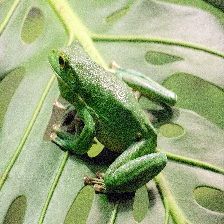

In [ ]:
frog = image.load_img('joel-henry-Rcvf6-n1gc8-unsplash.jpg', target_size=(224, 224))
frog

In [ ]:
# checks known image of frog
img1 = process_img_path('joel-henry-Rcvf6-n1gc8-unsplash.jpg')
img_contains_frog(img1)

'No frog here'

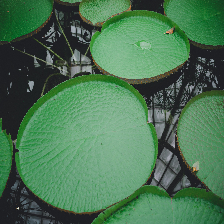

In [ ]:
image.load_img('elizabeth-explores-JZybccsrB-0-unsplash.jpg', target_size=(224, 224))

In [ ]:
# checks known image of frog
img1 = process_img_path('elizabeth-explores-JZybccsrB-0-unsplash.jpg')
img_contains_frog(img1)

'No frog here'

In [ ]:
frog = image.img_to_array(frog)
frog

array([[[193., 191., 140.],
        [201., 204., 151.],
        [193., 196., 143.],
        ...,
        [ 64.,  79.,  50.],
        [ 87., 102.,  69.],
        [ 75.,  95.,  58.]],

       [[225., 216., 177.],
        [189., 189., 139.],
        [202., 211., 158.],
        ...,
        [ 77.,  92.,  63.],
        [ 45.,  60.,  27.],
        [103., 119.,  83.]],

       [[201., 192., 149.],
        [178., 193., 138.],
        [163., 180., 126.],
        ...,
        [ 46.,  65.,  35.],
        [ 65.,  82.,  48.],
        [ 92., 108.,  72.]],

       ...,

       [[173., 192., 164.],
        [177., 191., 165.],
        [149., 164., 133.],
        ...,
        [125., 130., 100.],
        [126., 131.,  99.],
        [144., 151., 120.]],

       [[172., 191., 163.],
        [140., 153., 127.],
        [126., 146., 109.],
        ...,
        [129., 135., 101.],
        [114., 120.,  86.],
        [ 98., 104.,  70.]],

       [[153., 160., 129.],
        [168., 170., 156.],
        [122., 1

In [ ]:
import numpy as np
frog = np.expand_dims(frog, axis=0)
frog

array([[[[193., 191., 140.],
         [201., 204., 151.],
         [193., 196., 143.],
         ...,
         [ 64.,  79.,  50.],
         [ 87., 102.,  69.],
         [ 75.,  95.,  58.]],

        [[225., 216., 177.],
         [189., 189., 139.],
         [202., 211., 158.],
         ...,
         [ 77.,  92.,  63.],
         [ 45.,  60.,  27.],
         [103., 119.,  83.]],

        [[201., 192., 149.],
         [178., 193., 138.],
         [163., 180., 126.],
         ...,
         [ 46.,  65.,  35.],
         [ 65.,  82.,  48.],
         [ 92., 108.,  72.]],

        ...,

        [[173., 192., 164.],
         [177., 191., 165.],
         [149., 164., 133.],
         ...,
         [125., 130., 100.],
         [126., 131.,  99.],
         [144., 151., 120.]],

        [[172., 191., 163.],
         [140., 153., 127.],
         [126., 146., 109.],
         ...,
         [129., 135., 101.],
         [114., 120.,  86.],
         [ 98., 104.,  70.]],

        [[153., 160., 129.],
       

In [ ]:
from keras.applications.resnet50 import preprocess_input
frog = preprocess_input(frog)
frog

Using TensorFlow backend.


array([[[[ 36.060997 ,  74.221    ,  69.32     ],
         [ 47.060997 ,  87.221    ,  77.32     ],
         [ 39.060997 ,  79.221    ,  69.32     ],
         ...,
         [-53.939003 , -37.779    , -59.68     ],
         [-34.939003 , -14.778999 , -36.68     ],
         [-45.939003 , -21.779    , -48.68     ]],

        [[ 73.061    ,  99.221    , 101.32     ],
         [ 35.060997 ,  72.221    ,  65.32     ],
         [ 54.060997 ,  94.221    ,  78.32     ],
         ...,
         [-40.939003 , -24.779    , -46.68     ],
         [-76.939    , -56.779    , -78.68     ],
         [-20.939003 ,   2.2210007, -20.68     ]],

        [[ 45.060997 ,  75.221    ,  77.32     ],
         [ 34.060997 ,  76.221    ,  54.32     ],
         [ 22.060997 ,  63.221    ,  39.32     ],
         ...,
         [-68.939    , -51.779    , -77.68     ],
         [-55.939003 , -34.779    , -58.68     ],
         [-31.939003 ,  -8.778999 , -31.68     ]],

        ...,

        [[ 60.060997 ,  75.221    ,  4

In [ ]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')
features = model.predict(frog)
features

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a7b3fe01876f51b976af0dea6bc144eb so we will re-download the data.
102858752/102853048 [==============================] - 2s 0us/step


array([[4.83551190e-08, 4.39718626e-08, 2.65172471e-08, 1.28435875e-08,
        9.95573490e-09, 5.74024241e-08, 2.47138239e-08, 4.36523706e-09,
        1.10170086e-08, 2.80292484e-10, 1.55934146e-08, 7.21001996e-08,
        2.87302804e-08, 2.07607371e-08, 1.14321011e-07, 1.67045808e-08,
        2.59124278e-07, 3.38123414e-08, 1.07251621e-08, 1.10416487e-07,
        5.00384312e-09, 9.57004520e-09, 3.43444007e-09, 9.00426012e-10,
        1.84833393e-08, 4.32232309e-06, 3.27413409e-06, 2.00210229e-06,
        1.92193838e-07, 8.27052702e-07, 4.29175096e-04, 9.46898699e-01,
        1.73916668e-02, 1.84889455e-08, 6.22191294e-08, 2.96537763e-07,
        7.10813879e-07, 1.03431978e-06, 1.07341102e-05, 6.80742160e-05,
        1.00806355e-02, 1.30610704e-06, 4.53560606e-05, 8.49850551e-07,
        4.47409684e-06, 2.74998740e-07, 9.89154680e-04, 3.84784071e-03,
        1.59593060e-06, 5.52918920e-08, 4.39806662e-08, 1.28783398e-07,
        1.21471004e-07, 3.50962921e-08, 1.57393529e-08, 2.220244

In [ ]:
from keras.applications.resnet50 import decode_predictions

results = decode_predictions(features, top=3)[0]

In [ ]:
results

[('n01644373', 'tree_frog', 0.9468987),
 ('n01644900', 'tailed_frog', 0.017391667),
 ('n02229544', 'cricket', 0.010446983)]

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Autoencoders should be used as a preprocessing step to reduce the dimensionality, and this compressed representation is used to visualize the data in 2D space (visualizing hight dimensional data).


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

A few sentences per answer is fine - only elaborate if time allows.

#What do you consider your strongest area, as a Data Scientist?

Due to my professional profile, the strongest areas as a data scientist could be Regression tecniques (Linear Regression, Logistic Regression, Polynomial Regression, Stepwise Regresion) apply in  financial area or economy: Accounting, Cost, Supply Management, Audit. Business: budget, marketing, and social behavior: fraud, and others.

#What area of Data Science would you most like to learn more about, and why?

Database and architecture management and Business Intelligence and Strategy because artificial intelligence requires good management of model architecture for it to be successful.

#What are the threats posed by AI to our society?

imminently society tends to require restructuring in their behaviors, habits, and rights because artificial intelligence increasingly depends on interacting with society and this leads to IA gaining a space that society loses that is: privacy, overcontrol when being forced to accept the changes that are generated by these new technologies. also discrimination, weapons, social manipulation, invasion of privacy, misalignment between our goals and the machine’s

#How do you think we can counteract those threats?

We can counteract threats by having a high level of ethics and principles, in addition to respecting the laws and regulations that are created to control the abuse of power that generates access to all these new technologies. We know that this area is not easy because, due to the nature of man, it always seeks to overcome the barriers it places on its own purposes, whether good or bad. Thus, it becomes necessary not only to implement advanced and versatile programs but also safe for users. They are one of the great challenges facing this area.

#Do you think achieving General Artifical Intelligence is ever possible?

I think it is possible to reach a general artificial intelligence, but which will require many years of effort and dedication, technology is like a virus that invades everything it touches. the reason why it will unquestionably lead us to interact with this technology, since man has become obsessed with this, thinking that this will greatly facilitate life, in addition to putting power in the hands of a few.